In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#**Load the Data**

In [ ]:
!unzip /content/drive/MyDrive/AlfitoTech_Internship/Iris_Flower_Classification/IRIS.zip

Archive:  /content/drive/MyDrive/AlfitoTech_Internship/Iris_Flower_Classification/IRIS.zip
  inflating: IRIS.csv                


In [ ]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#**DATA VISULIZATION**

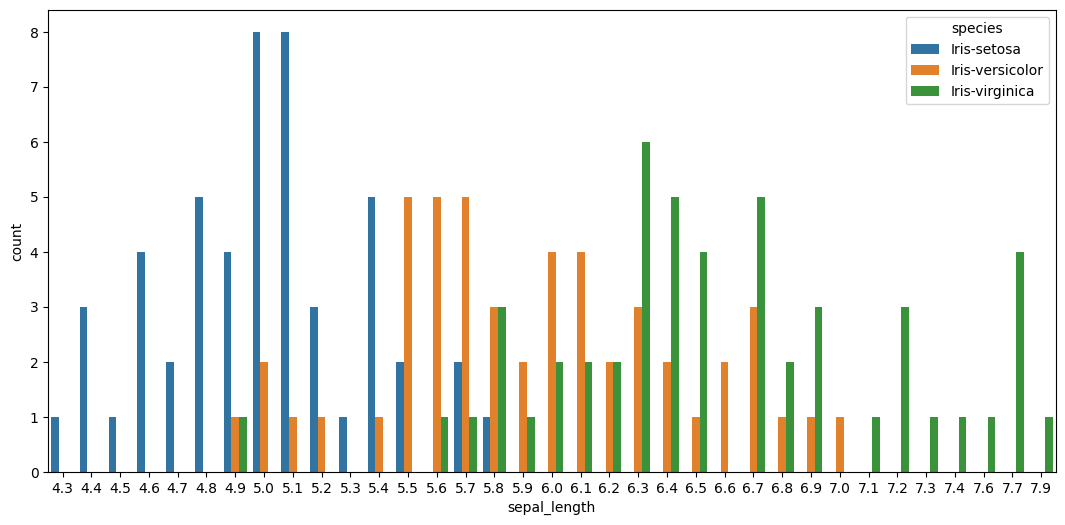

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x="sepal_length", data=df, hue="species")
plt.show()

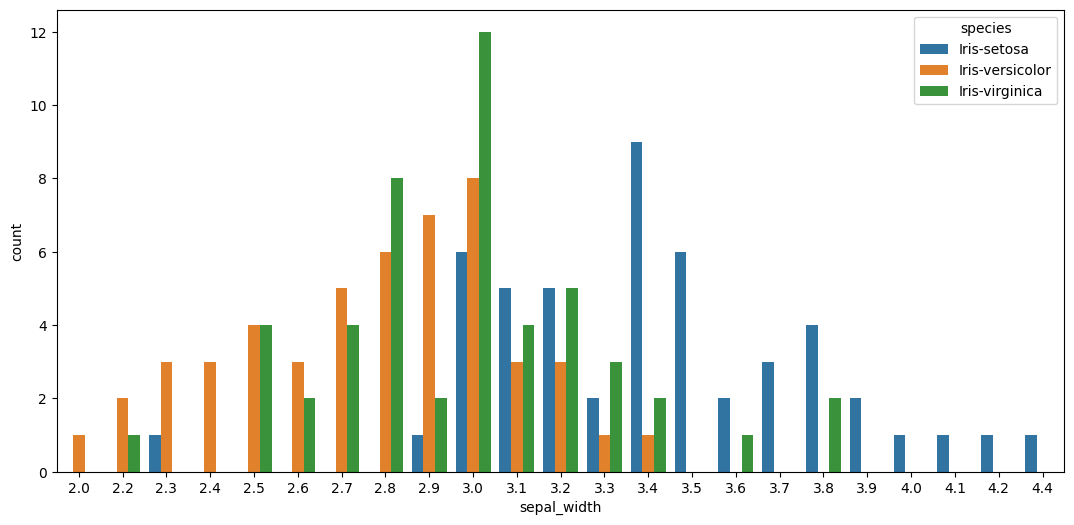

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x="sepal_width", data=df, hue="species")
plt.show()

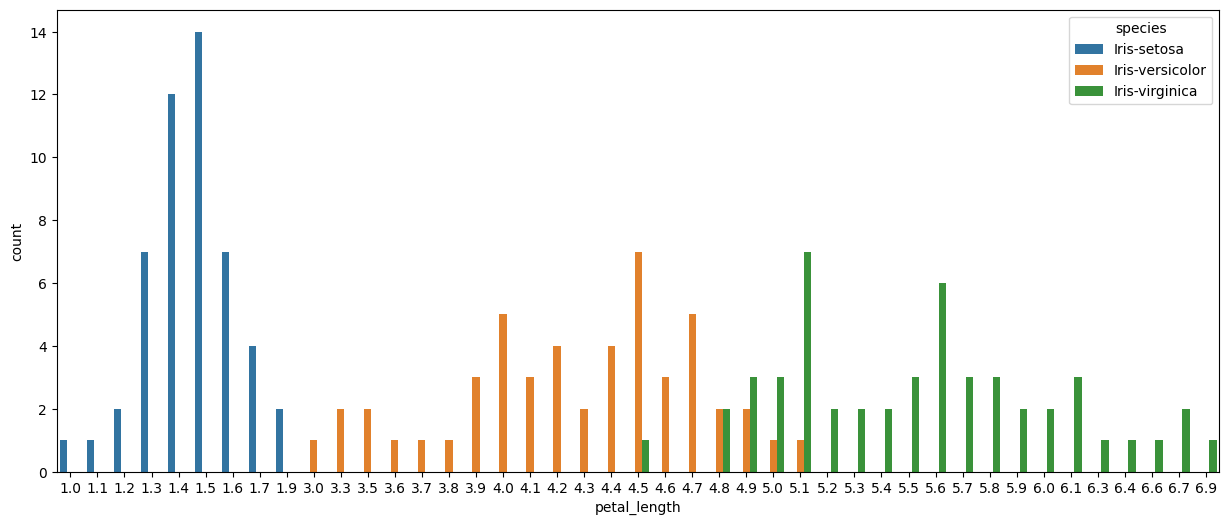

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="petal_length", data=df, hue="species")
plt.show()

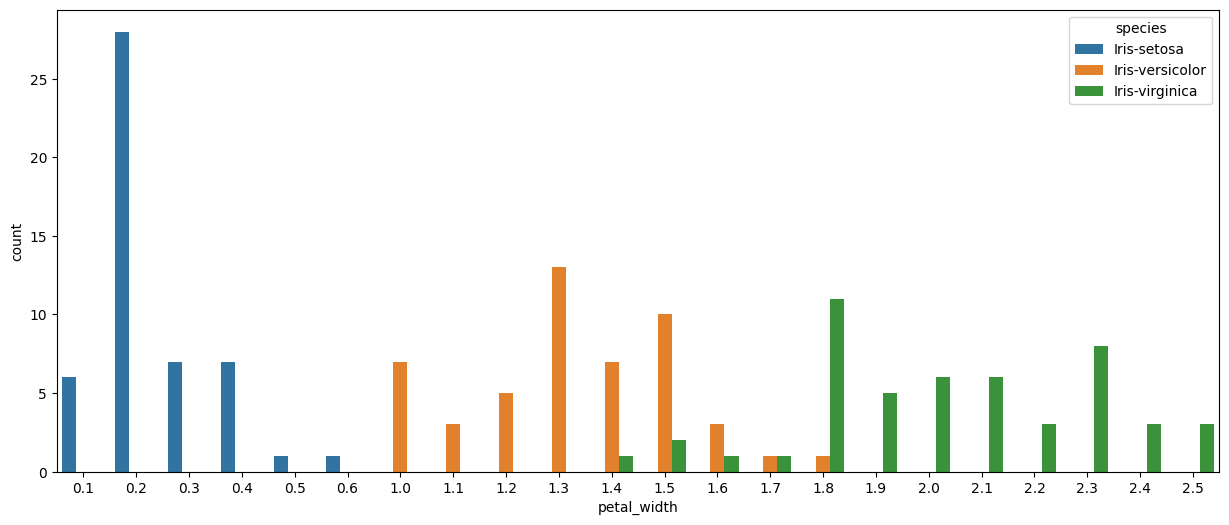

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="petal_width", data=df, hue="species")
plt.show()

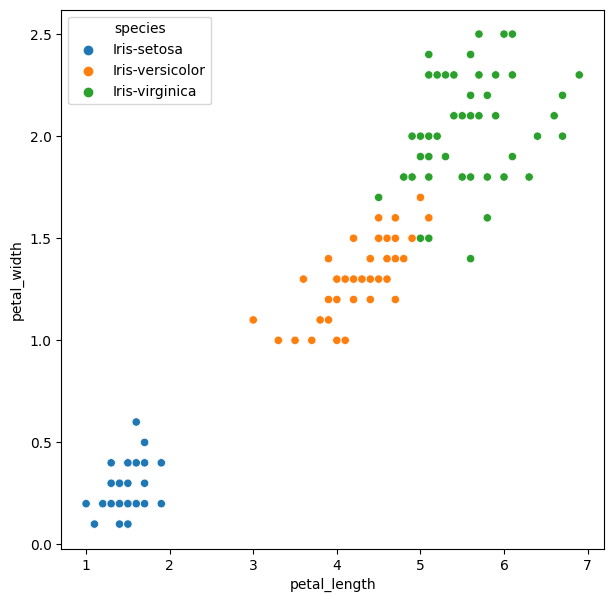

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species")
plt.show()

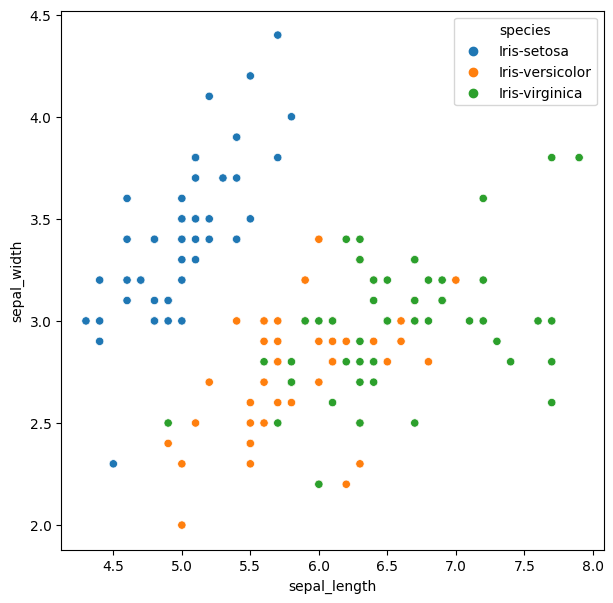

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue="species")
plt.show()

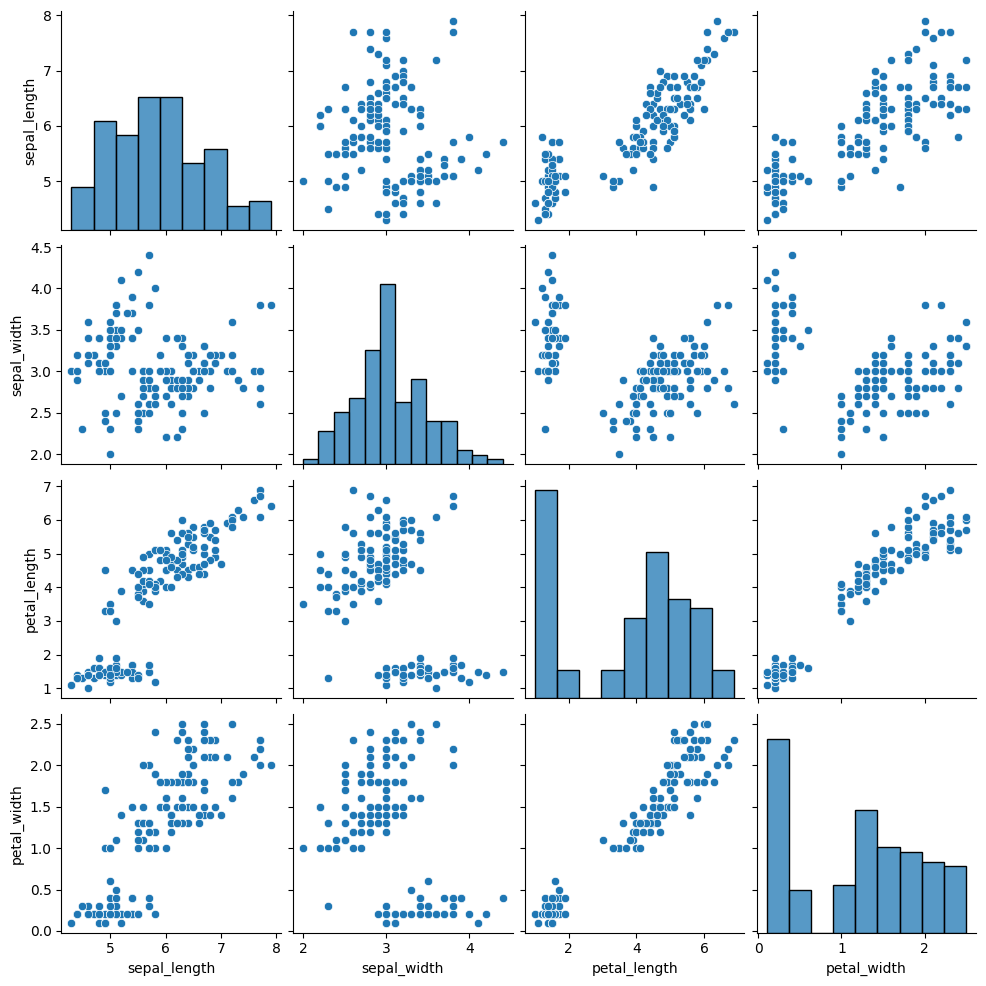

In [ ]:
sns.pairplot(df)

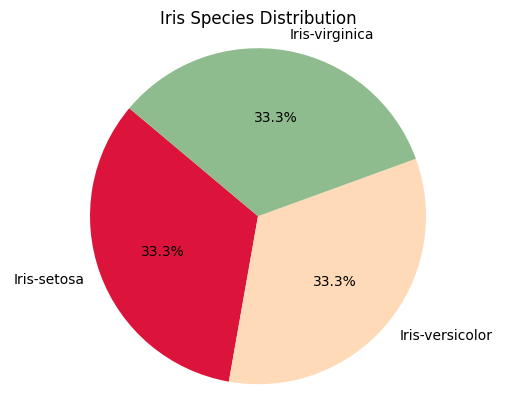

In [ ]:
species_counts = df['species'].value_counts()
custom_colors = ['crimson', 'peachpuff', 'darkseagreen']
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')
plt.title('Iris Species Distribution')
plt.show()

In [ ]:
x=df.drop(['species'], axis=1)
y=df['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 26)

#**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 0.97 

Test set score: 0.98 

Accuracy Score: 0.98 

Classification_Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')

Logistic Regression Accuracy:  97.78%


#**decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decc = DecisionTreeClassifier()
decc.fit(x_train,y_train)
y_pred_decc = decc.predict(x_test)

print("Training set score: {:.2f}".format(decc.score(x_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(x_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 0.98
Accuracy Score: 0.98
Classification_Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



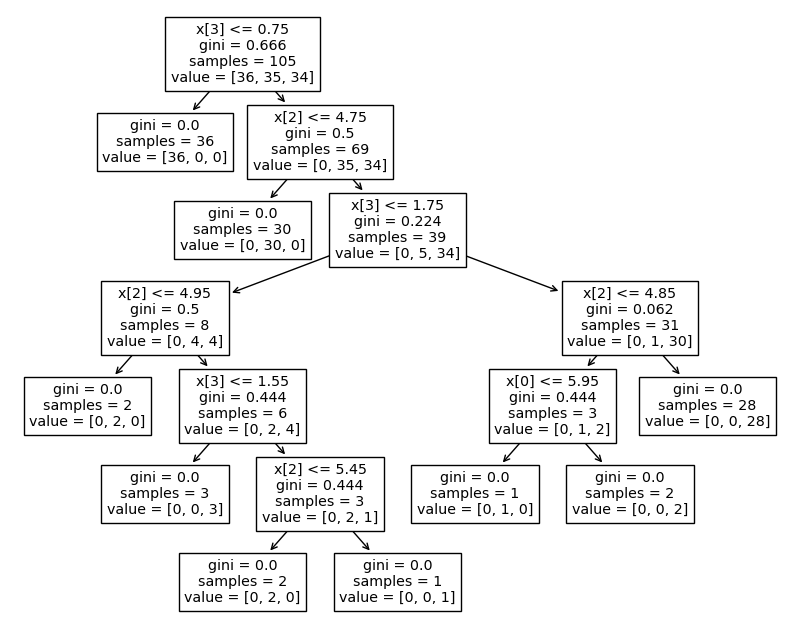

In [ ]:
plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(decc.fit(x_train, y_train))
plt.show()

# **K nearest neighbors(KNN)**

In [ ]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
y_pred_knn = KNN_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

0.9555555555555556


In [ ]:
knn_scores = cross_val_score(KNN_model, x_train, y_train, cv=5)
print("Mean Accuracy: {:.2f}".format(knn_scores.mean()))
print("Score Variance: {:.2f}".format(knn_scores.std()))

Mean Accuracy: 0.95
Score Variance: 0.03


#**SVM**

In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [ ]:
scores = cross_val_score(svm_model, x_train, y_train, cv=5)
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))

Mean Accuracy: 0.93
Score Variance: 0.07
